In [1]:
# Import needed libraries. Load the DF. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\prabh\OneDrive\Documents\Lambton\Semester 2\Visualization for AI and ML\Week9_forest\forest\fires.csv")

C:\Users\prabh\AppData\Local\Temp\ipykernel_6868\292825117.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\prabh\OneDrive\Documents\Lambton\Semester 2\Visualization for AI and ML\Week9_forest\forest\fires.csv")


#### (I) Explore the data:





Q1. Find the dimensions of the DF. Make the colnames lowercase.

In [4]:
df.shape

(1880465, 8)

In [5]:
columns = df.columns
columns
df.columns = [col.lower() for col in columns ]
df.columns

Index(['fire_name', 'fire_size', 'state', 'latitude', 'longitude', 'fire_year',
       'discovery_date', 'contain_date'],
      dtype='object')

Q2. Rename the column `fire_size` to `acres_burned`.

In [6]:
df.rename(columns={'fire_size':'acres_burned'}, inplace=True)

Q3. Convert the data in the `fire_name` column such that the data starts with a capital letter. (ie `PIGEON` -> `Pigeon`)

In [7]:
values = df['fire_name'].to_numpy()
strValues = [str(name) for name in values]
df['fire_name'] = pd.DataFrame([name.capitalize() for name in strValues])
df.head(2)


,fire_name,acres_burned,state,latitude,longitude,fire_year,discovery_date,contain_date
0,Fountain,0.10,CA,40.036944,-121.005833,2005,2005-02-02 00:00:00,2005-02-02 00:00:00
1,Pigeon,0.25,CA,38.933056,-120.404444,2004,2004-05-12 00:00:00,2004-05-12 00:00:00


Q4. Drop unnecessary rows- having fire size less than 10 acres.

In [8]:
df.shape

(1880465, 8)

In [9]:
df = df.drop(df[df['acres_burned'] < 10].index)
df.shape

(274170, 8)


Q5. Drop duplicate rows, if any. If so, keep the first duplicate of each such duplicate set.


In [10]:
df.drop_duplicates(keep='first',inplace=True)
df.shape

(274123, 8)


Q6. Ensure that the `date` columns have the correct datatype.


In [11]:
df['discovery_date']= pd.to_datetime(df['discovery_date'])
df['contain_date']= pd.to_datetime(df['contain_date'])
df['discovery_date'].dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274123 entries, 16 to 1880441
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   fire_name       274123 non-null  object        
 1   acres_burned    274123 non-null  float64       
 2   state           274123 non-null  object        
 3   latitude        274123 non-null  float64       
 4   longitude       274123 non-null  float64       
 5   fire_year       274123 non-null  int64         
 6   discovery_date  274123 non-null  datetime64[ns]
 7   contain_date    137376 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(1), object(2)
memory usage: 18.8+ MB



Q7. Check for missing values in the `contain_date` column. Find the number.

a) Check for missing values of  `contain_date`  where fires exceed 10000 acres.

b) Check the values of  `contain_date` to see if they are reasonable.


In [12]:
df[df['contain_date'].isna()].head(2)

,fire_name,acres_burned,state,latitude,longitude,fire_year,discovery_date,contain_date
1566,Seven springs,85.0,MO,36.992500,-92.186111,2005,2005-03-17,NaT
5095,Peppin,64488.0,NM,33.601389,-105.433333,2004,2004-05-15,NaT


In [13]:
df[(df['contain_date'].isna()) & (df['acres_burned'] > 1000)].head(2)
#df.query("contain_date == 'NaT' and fire_size > 1000")

,fire_name,acres_burned,state,latitude,longitude,fire_year,discovery_date,contain_date
5095,Peppin,64488.0,NM,33.601389,-105.433333,2004,2004-05-15,NaT
14306,Harvey,1247.0,CA,40.058889,-122.908056,2006,2006-06-26,NaT


In [14]:
df.query('acres_burned > 1000').sort_values('acres_burned', ascending=False)

,fire_name,acres_burned,state,latitude,longitude,fire_year,discovery_date,contain_date
211296,Inowak,606945.0,AK,61.982700,-157.085700,1997,1997-06-25,1997-09-09
1579574,Long draw,558198.3,OR,42.391894,-117.893687,2012,2012-07-08,2012-07-30
1459664,Wallow,538049.0,AZ,33.606111,-109.449722,2011,2011-05-29,2011-07-12
305585,Boundary,537627.0,AK,65.266300,-146.885800,2004,2004-06-13,2004-09-30
1215267,Minto flats south,517078.0,AK,64.746700,-149.504700,2009,2009-06-21,2009-09-11
...,...,...,...,...,...,...,...,...
1325050,Abbotts branch,1001.0,WV,38.000612,-81.399058,1995,1995-04-05,1995-04-11
1573796,Impact,1001.0,ID,43.257130,-116.090220,2012,2012-06-07,2012-06-07
1796371,Whitefish lake 2,1000.4,AK,61.380000,-160.370000,2015,2015-05-31,2015-06-02
340311,Jack mtn,1000.1,OR,42.965400,-118.966600,2006,2006-07-23,2006-07-25


#### (II) Prepare the data:

Q9. Add the `fire_month` and `days_burning` columns

In [15]:
df['fire_month'] = df['discovery_date'].dt.strftime('%b')
df['days_burning'] = (df['contain_date'] - df['discovery_date']).dt.days
df.head(10)

,fire_name,acres_burned,state,latitude,longitude,fire_year,discovery_date,contain_date,fire_month,days_burning
16,Power,16823.0,CA,38.523333,-120.211667,2004,2004-10-06,2004-10-21,Oct,15.0
17,Freds,7700.0,CA,38.780000,-120.260000,2004,2004-10-13,2004-10-17,Oct,4.0
25,Bachelor,10.0,NM,33.315833,-105.512222,2004,2004-07-20,2004-07-20,Jul,0.0
37,Howard gap,50.3,NC,35.000278,-83.351111,2005,2005-01-27,2005-01-28,Jan,1.0
39,Austin creek,125.0,NC,36.001667,-81.590000,2005,2005-02-12,2005-02-13,Feb,1.0
40,Headquarters,25.0,NC,35.985000,-81.851667,2005,2005-04-16,2005-04-16,Apr,0.0
42,Mountain,10.0,NC,36.035000,-81.585000,2005,2005-05-09,2005-05-09,May,0.0
45,Waterloo,10.0,NC,35.001389,-83.384167,2005,2005-03-11,2005-03-11,Mar,0.0
70,Olsen hill,17.0,MT,48.966667,-115.206667,2005,2005-05-02,2005-05-02,May,0.0
85,Antelope,45.6,NM,32.467222,-104.941667,2005,2005-07-07,2005-07-08,Jul,1.0



Q10. Get the statistical summary of the `days_burning` column. What trends do you see in the 3rd quartile, mean and Max length of the fires? Is or isn't anything fishy?


In [16]:
df['days_burning'].describe()
#df.boxplot(column='days_burning')

count    137376.000000
mean          3.254520
std          16.052833
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max        1881.000000
Name: days_burning, dtype: float64


Q11. Check the value of `days_burning` for fires that exceed 100 acres. What do you notice about the acreage and the `days_burning` for certain outliers?


#### (III) Biz Q's:

For California:

BQ1. Plot the maximum fire size, per year.

<AxesSubplot: xlabel='Years'>

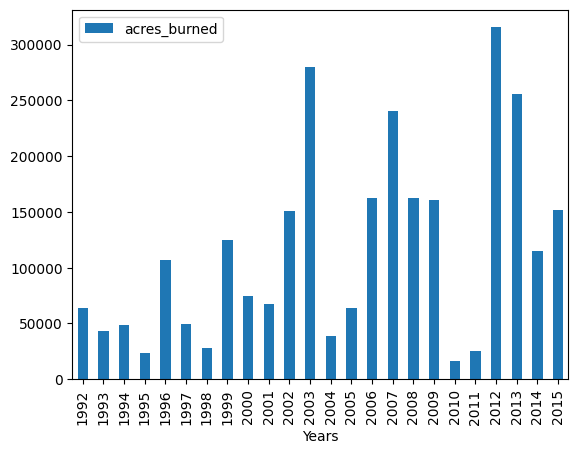

In [17]:
df.query("state == 'CA'").groupby('fire_year').agg({'acres_burned':'max'}).plot.bar(xlabel='Years')

For California:
    
BQ2. Plot the mean and median fire size, per year.

In [25]:
df.query("state == 'CA'")[['acres_burned']].describe()

,acres_burned
count,14299.000000
mean,881.934274
std,7342.398281
min,10.000000
25%,15.000000
50%,39.000000
75%,135.000000
max,315578.800000


In [31]:
df.query("state == 'CA'").groupby('fire_year').agg({'acres_burned':['mean','median']})

acres_burned       
                  mean median
fire_year                    
1992        338.705972  38.50
1993        416.681349  35.00
1994        520.906874  35.00
1995        316.095045  40.00
1996        715.038202  40.00
1997        539.817428  30.00
1998        295.223954  35.00
1999       1138.212981  35.00
2000        589.887143  30.00
2001        607.017254  35.00
2002        842.868926  38.00
2003       1557.709363  40.00
2004        499.793226  35.00
2005        404.396810  33.00
2006       1121.595271  40.00
2007       1642.834509  31.15
2008       2013.470014  60.00
2009       1108.653202  42.00
2010        319.501126  39.85
2011        358.109096  33.00
2012       1714.654808  38.00
2013       1144.245825  36.00
2014       1847.052143  45.00
2015       2133.015202  50.00

<AxesSubplot: title={'center': 'Mean and Median fire_size, per year'}, xlabel='fire_year'>

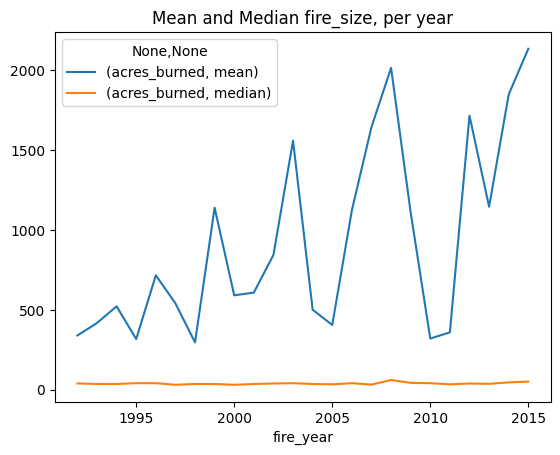

In [34]:
df.query("state == 'CA'").groupby('fire_year').agg({'acres_burned':['mean','median']}).\
    plot(title='Mean and Median fire_size, per year')

For California:
    
BQ3. Which month has seen the highest NUMBER of fires, in california? (throughout all-time)

In [44]:
df.head(2)

,fire_name,acres_burned,state,latitude,longitude,fire_year,discovery_date,contain_date,fire_month,days_burning
16,Power,16823.0,CA,38.523333,-120.211667,2004,2004-10-06,2004-10-21,Oct,15.0
17,Freds,7700.0,CA,38.780000,-120.260000,2004,2004-10-13,2004-10-17,Oct,4.0


In [64]:
df[df['state'] == 'CA'].groupby('fire_month').agg({'acres_burned':'max'})

,acres_burned
fire_month,
Apr,19839.0
Aug,315578.8
Dec,30000.0
Feb,12000.0
Jan,10353.0
Jul,240207.0
Jun,162818.0
Mar,4100.0
May,47000.0


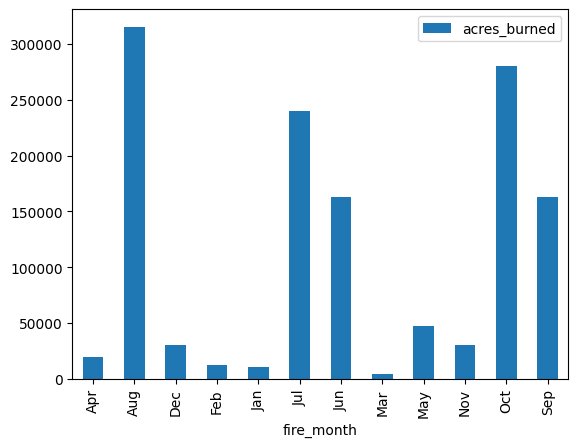

In [51]:
df[df['state'] == 'CA'].groupby('fire_month').agg({'acres_burned':'max'}).plot.bar(xlabel='fire_month')
plt.show()

In [77]:
df[df['state'] == 'CA'].groupby('fire_month').agg({'state':'count'}).sort_values(by=['fire_month'])

,state
fire_month,
Apr,341
Aug,2832
Dec,133
Feb,79
Jan,126
Jul,3426
Jun,2731
Mar,138
May,1351


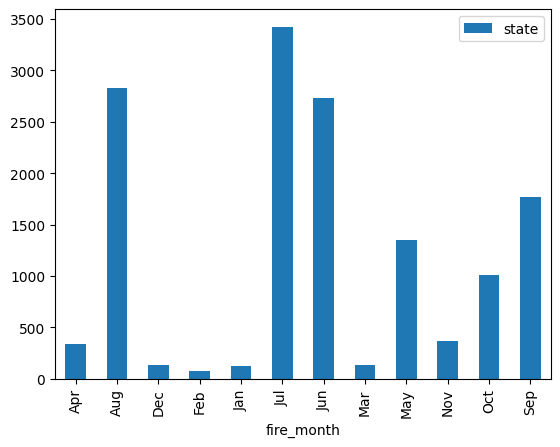

In [78]:
df[df['state'] == 'CA'].groupby('fire_month').agg({'state':'count'}).plot.bar()
plt.show()

Q4: Which are the 5-worst-affected states?  

In [85]:
df.groupby('state').agg({'acres_burned':'sum'})

,acres_burned
state,
AK,3.222601e+07
AL,8.101628e+05
AR,4.502221e+05
AZ,5.532198e+06
CA,1.261078e+07
CO,1.827215e+06
CT,7.358200e+03
DE,4.674500e+03
FL,4.312279e+06


<AxesSubplot: xlabel='state'>

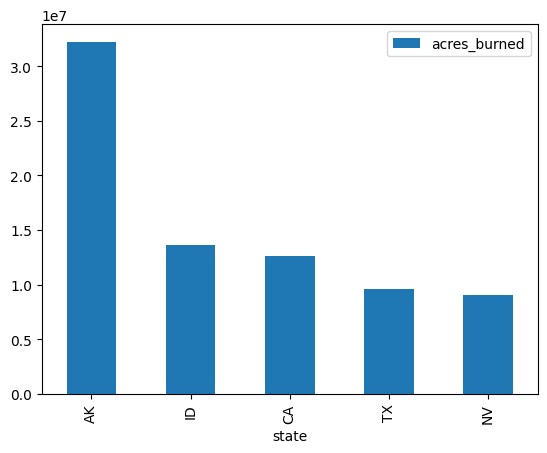

In [84]:
df.groupby('state').agg({'acres_burned':'sum'}).sort_values(by=['acres_burned'], ascending=False).head(5).plot.bar()

<AxesSubplot: xlabel='state'>

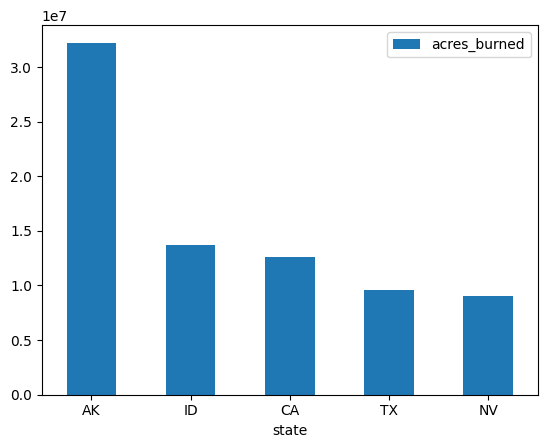

In [86]:
df.groupby('state').agg({'acres_burned':'sum'}).sort_values(by=['acres_burned'], ascending=False).head(5).plot.bar(rot=0)

Q5.a: For the worst_affected state, find the top-5 years with the largest total coverage of fires?

Q5.b: For the worst_affected state, which was the most devastating year?

In [92]:
df[df['state'] == 'AK']['fire_year'].unique()

array([2005, 2009, 1992, 1993, 1996, 1997, 1998, 1999, 2001, 1994, 1995,
       2000, 2002, 2003, 2004, 2006, 2007, 2008, 2010, 2011, 2012, 2013,
       2014, 2015], dtype=int64)

In [97]:
df[df['state'] == 'AK'].groupby(['state','fire_year']).agg({'acres_burned':'sum'}).sort_values(by='acres_burned', ascending=False).head(5)

acres_burned
state fire_year              
AK    2004       6.591431e+06
      2015       5.136373e+06
      2005       4.635536e+06
      2009       2.949289e+06
      2002       2.186329e+06

<AxesSubplot: xlabel='state,fire_year'>

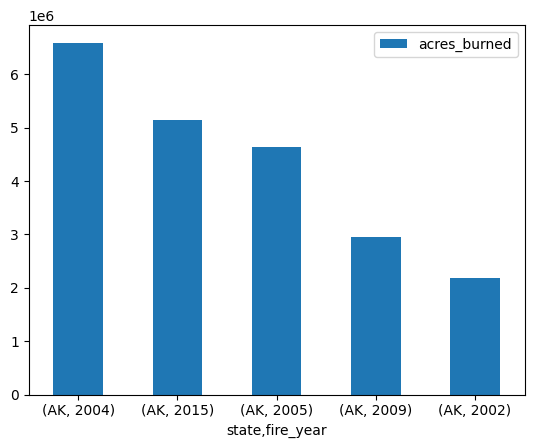

In [100]:
df[df['state'] == 'AK'].groupby(['state','fire_year']).agg({'acres_burned':'sum'}).sort_values(by='acres_burned', ascending=False).head(5).plot.bar(rot=0)

In [98]:
df[df['state'] == 'AK'].groupby(['state','fire_year']).agg({'acres_burned':'sum'}).sort_values(by='acres_burned', ascending=False).head(1)

,,acres_burned
state,fire_year,
AK,2004,6.591431e+06
